# Running a Neural Network with Python

## A Neural Network Class

In [7]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

    def __init__(self, no_of_in_nodes, no_of_out_nodes,
                no_of_hidden_nodes, learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()


    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)

        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                       self.no_of_in_nodes))
        
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)

        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                         self.no_of_hidden_nodes))


    def train(self):
        pass

    def run(self):
        pass

In [8]:
simple_network = NeuralNetwork(no_of_in_nodes=3,
                               no_of_out_nodes=2,
                               no_of_hidden_nodes=4,
                               learning_rate=0.1)

print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[-0.36210211 -0.31284212 -0.01717246]
 [ 0.08340337 -0.25406519  0.44743702]
 [-0.57202468 -0.18455059  0.52388652]
 [-0.01059428  0.19311823 -0.22065466]]
[[ 0.46595181  0.31621544 -0.34598573 -0.13660103]
 [ 0.19262072 -0.48339334 -0.09947366  0.36219932]]


### Activation Functions, Sigmoid, and ReLU

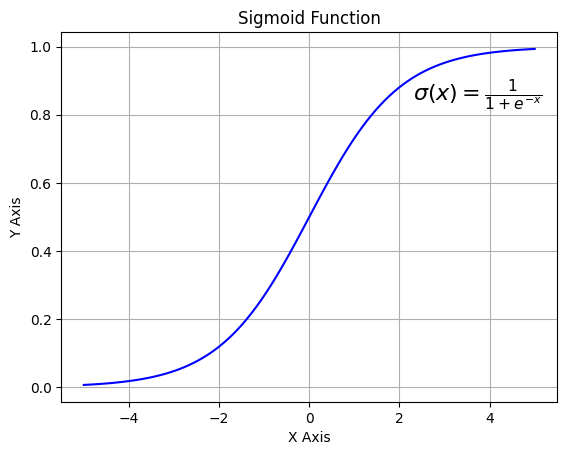

In [9]:
import matplotlib.pyplot as plt


def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X), 'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)

plt.show()

In [12]:
from scipy.special import expit

print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


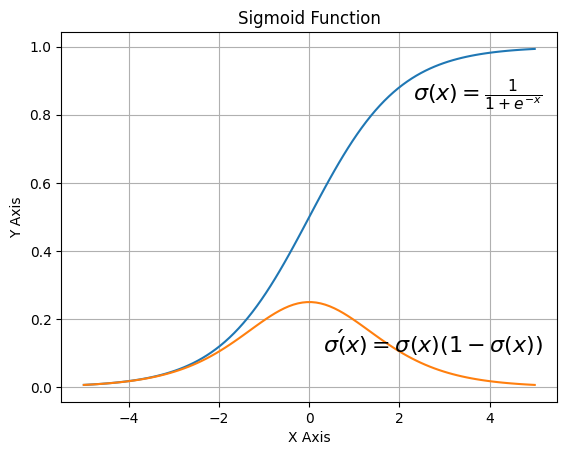

In [13]:
X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1- sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)

plt.show()

In [14]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [15]:
def ReLU(x):
    return np.maximum(0.0, x)

def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 0 

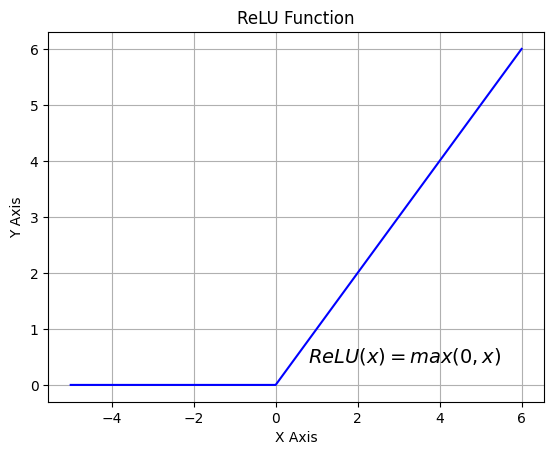

In [16]:
X = np.linspace(-5, 6, 100)

plt.plot(X, ReLU(X), 'b')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.title('ReLU Function')

plt.grid()

plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)

plt.show()

### Adding a run Method

In [19]:
from scipy.special import expit as activation_function

import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

    def __init__(self, no_of_in_nodes, no_of_out_nodes,
                no_of_hidden_nodes, learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()


    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)

        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                       self.no_of_in_nodes))
        
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)

        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                         self.no_of_hidden_nodes))


    def train(self):
        pass

    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)

        return output_vector

In [20]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=2,
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

simple_network.run([(3, 4)])

array([[0.53043831],
       [0.43331485]])